0
{'path_type': 'sine_y', 'amplitude': 1.3469665540364204, 'frequency': 0.37848972905482114}


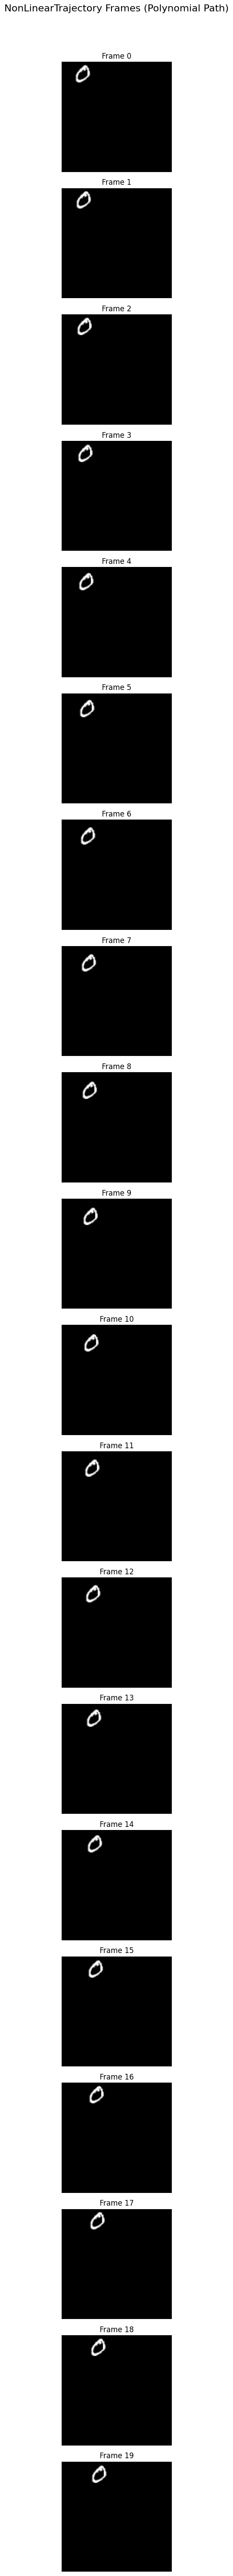

In [7]:
import datasets
from src.detection_moving_mnist.mmnist.mmnist import get_trajectory_params
from src.detection_moving_mnist.mmnist.trajectory import NonLinearTrajectory
import random
import math

import torch
import torchvision.transforms.functional as TF
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from types import SimpleNamespace
from torchvision.datasets import MNIST

# 1. Define necessary parameters for instantiation
CANVAS_WIDTH = 128
CANVAS_HEIGHT = 128
N_FRAMES = 20

random.seed(43)

# Create a mock MNIST image (a simple 28x28 cross) for demonstration
mnist_img = torch.zeros((1, 28, 28), dtype=torch.float32)
mnist_img[:, 10:18, 13:15] = 1.0  # Vertical bar
mnist_img[:, 13:15, 10:18] = 1.0  # Horizontal bar

# Define affine transformation parameters
affine_params = SimpleNamespace(
    translate=((0, 5), (0, 5)),
    angle=(0, 0),
    scale=(1, 1),
    shear=(0, 0)
)

trajectory_class = NonLinearTrajectory

mnist_dataset = MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_img, label = mnist_dataset[1]
print(label)

params = {
    "path_type": 'sine_y',
    "amplitude": random.uniform(1, 10),
    "frequency": random.uniform(0.1, 0.5),
}  #get_trajectory_params(trajectory_class, label)

print(params)

# 2. Instantiate the NonLinearTrajectory
nonlinear_trajectory = trajectory_class(
    digit_label=5,
    affine_params=affine_params,
    n=N_FRAMES,
    padding=(20, 20, 20, 20),
    initial_position=(-40, -50),  # Start at the bottom-left
    mnist_img=mnist_img,
    first_appearance_frame=0,
    canvas_width=CANVAS_WIDTH,
    canvas_height=CANVAS_HEIGHT,
    **params
)

# 3. Call the trajectory to get the result
# The result is a dictionary where keys are frame numbers
result_frames = nonlinear_trajectory()

# 4. Visualize all frames in one column
# Set up the plot with N_FRAMES rows and 1 column
fig, axes = plt.subplots(N_FRAMES, 1, figsize=(3, N_FRAMES * 3))
fig.suptitle("NonLinearTrajectory Frames (Polynomial Path)", fontsize=16)

for i in range(N_FRAMES):
    ax = axes[i]
    # Get the frame tensor from the results
    frame_tensor = result_frames[i]['frame']

    # Convert tensor to a NumPy array for plotting and remove the channel dimension
    frame_np = frame_tensor.squeeze().cpu().numpy()

    ax.imshow(frame_np, cmap='gray')
    ax.set_title(f"Frame {i}")
    ax.axis('off')  # Hide axes ticks

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make space for the suptitle
plt.show()